In [1]:
from util___ import *                    # Local utility function collection
from pack___ import *                    # Local import-package statement collection
def sval(str):xval(str,scope=globals()); # globals() for "this" sval (not for xval).
x=1;sval('x');                           # (test-case) # >>> x ===> 1 

======> tic @ 2024-05-30 23:55:49

======>     toc =   0.0010 sec @ from c:\X\5\util___.py import ...
======> tic @ 2024-05-30 23:55:49

======>     toc =  16.3533 sec @ from c:\X\5\pack___.py import ...

>>> x ===> 1


In [2]:
#
# To-Do 패션 MNIST  
#
# 1.정규화                                        --> ! Done @ # Data Preparation
# 2.딥러닝 학습                                   --> ! Done @ # Model Building & Fit 
# 3.train : 정확도,  F1-score, confusion marix    --> ? Done @ # Model Prediction & Accuracy Check
# 4.test  : 정확도,  F1-score, confusion marix    --> ? Done @ # Model Prediction & Accuracy Check
# 5.test 3번 이미지에 대한 예측값 <-- y_test[2]    --> ! Done @ # Model Prediction & Accuracy Check 
#  
# 다중분류 F1_score= f1_score(y_true, y_pred) 에러 발생시 --> f1_score(y_true, y_pred, average='macro')  
#
tic()
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
sval('dir(fashion_mnist)')
sval('dir(fashion_mnist.__spec__)')
toc()

======> tic @ 2024-05-30 23:56:05

>>> dir(fashion_mnist) ===> ['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'load_data']

>>> dir(fashion_mnist.__spec__) ===> ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cached', '_initializing', '_set_fileattr', 'cached', 'has_location', 'loader', 'loader_state', 'name', 'origin', 'parent', 'submodule_search_locations']

======>     toc =   0.3660 sec 


======> tic @ 2024-05-30 23:56:05

>>> F_Name ===> ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

>>> type(x_train), type(y_train) ===> (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)

>>> x_train.shape, y_train.shape ===> ((60000, 28, 28), (60000,))

>>> x_test.shape,  y_test.shape  ===> ((10000, 28, 28), (10000,))

>>> F_Name  ===> ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

>>> F_Class ===> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

>>> np.unique(y_test) ===> [0 1 2 3 4 5 6 7 8 9]

>>> all(F_Class == np.unique(y_test)) ===> True


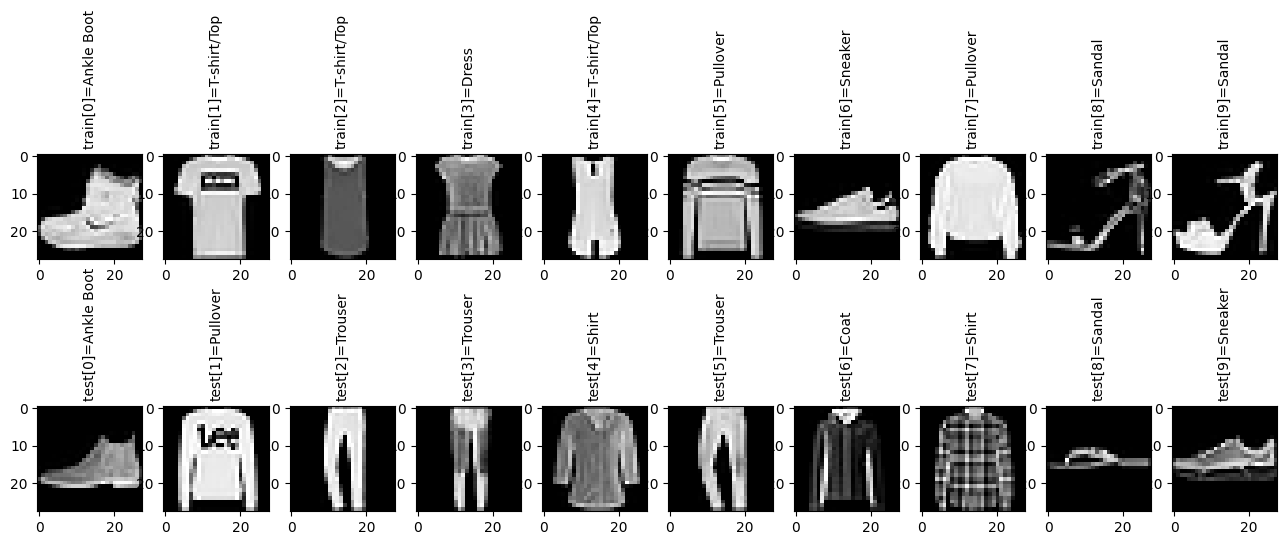


======>     toc =   1.8624 sec 


In [3]:
tic()
#
# Each image is mapped to a single label. Since the class names are not included with the dataset, 
# store them here to use later when plotting the images:
#
F_Dict  = {0: "T-shirt/Top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",  5: "Sandal",  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
F_Name  = list(F_Dict.values()) # 
F_Class = list(F_Dict.keys())   # 

sval('F_Name')
sval('type(x_train), type(y_train)')
sval('x_train.shape, y_train.shape')
sval('x_test.shape,  y_test.shape ')
sval('F_Name ') # >>> F_Name  ===> ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
sval('F_Class') # >>> F_Class ===> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sval('np.unique(y_test)')
sval('all(F_Class == np.unique(y_test))')
#
fig, ax = plt.subplots(2,10)

for j in range(0,10): # check the first 10 train images 
    ax[0][j].imshow(x_train[j],cmap='gray');ax[0][j].set_title('train['+str(j)+']='+F_Name[y_train[j]],rotation=90,fontsize=10);

for j in range(0,10): # check the first 10 test images 
    ax[1][j].imshow(x_test[j], cmap='gray');ax[1][j].set_title('test['+str(j)+']='+F_Name[y_test[j]],rotation=90,fontsize=10);

fig.set_size_inches(16,6)
plt.show();
    
# plt.imshow(x_test[2],cmap='gray');sval('F_Name[y_test[2]]');  # >>> F_Name[y_test[2]] ===> Trouser
toc()

In [4]:
tic()
#
# Data Preparation
#
x_train_N = x_train / 255; # Data Normalization of Image Dataset for Train
x_test_N  = x_test  / 255; # Data Normalization for Image Dataset for Test
sval('np.min(x_train  ), np.max(x_train  )') 
sval('np.min(x_train_N), np.max(x_train_N)')
sval('x_train_N.shape, x_test_N.shape')
toc()

======> tic @ 2024-05-30 23:56:07

>>> np.min(x_train  ), np.max(x_train  ) ===> (0, 255)

>>> np.min(x_train_N), np.max(x_train_N) ===> (0.0, 1.0)

>>> x_train_N.shape, x_test_N.shape ===> ((60000, 28, 28), (10000, 28, 28))

======>     toc =   0.1707 sec 


In [5]:
tic()
#
#  Model Building & Fit
#
          # Use 'sparse_categorical_crossentropy' for integer-encoded label classification
loss          = 'sparse_categorical_crossentropy'  ; # Not 'categorical_crossentropy', which works only for one-hot encoded label.
optimizer     = Adam(learning_rate = 0.001);         # learning_rate = 0.1 does not converge !!
metrics       = ['accuracy'];                        # To model.compile

model = Sequential(Flatten(input_shape=(28, 28))); # <Input>-Layer for Flatten-Only
model.add(Dense(256, activation='relu'));          # relu for deep & hidden layer
model.add(Dense(128, activation='relu'));          # relu for deep & hidden layer
model.add(Dense(64,  activation='relu'));          # relu for deep & hidden layer
model.add(Dense(32,  activation='relu'));          # relu for deep & hidden layer
model.add(Dense(10,  activation='softmax'));       # softmax for muti-label classification <Output> layer
model.compile( loss = loss, optimizer = optimizer , metrics =  metrics )
history1 = model.fit( x_train_N, y_train, epochs   = 8, verbose=1  );       # verbose=0  --> silent mode, verbose=1 --> progress bar, verbose=2 --> result   
loss_test1, accuracy_test1 = model.evaluate(x_test_N,  y_test, verbose=2);  # verbose=0  --> silent mode, verbose=1 --> progress bar, verbose=2 --> result 
toc();

======> tic @ 2024-05-30 23:56:07
Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5059 - accuracy: 0.8178
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3733 - accuracy: 0.8632
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8766
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8844
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8915
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2774 - accuracy: 0.8952
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.8992
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2550 - accuracy: 0.9043
313/313 - 1s - loss: 0.3267 - accuracy: 0.8858 - 515ms/epoch - 2ms/step

======>     toc =  33.1266 sec 


In [6]:
tic();
history2 = model.fit( x_train_N, y_train, epochs   = 4, verbose=1  );       # verbose=0  --> silent mode, verbose=1 --> progress bar, verbose=2 --> result   
loss_test2, accuracy_test2 = model.evaluate(x_test_N,  y_test, verbose=2);  # verbose=0  --> silent mode, verbose=1 --> progress bar, verbose=2 --> result 
toc();

======> tic @ 2024-05-30 23:56:41
Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2455 - accuracy: 0.9082
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2386 - accuracy: 0.9087
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2301 - accuracy: 0.9137
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2234 - accuracy: 0.9156
313/313 - 0s - loss: 0.3424 - accuracy: 0.8851 - 395ms/epoch - 1ms/step

======>     toc =  16.3342 sec 


In [7]:
tic();
history3 = model.fit( x_train_N, y_train, epochs   = 2, verbose=1  );       # verbose=0  --> silent mode, verbose=1 --> progress bar, verbose=2 --> result   
loss_test3, accuracy_test3 = model.evaluate(x_test_N,  y_test, verbose=2);  # verbose=0  --> silent mode, verbose=1 --> progress bar, verbose=2 --> result 
toc();

======> tic @ 2024-05-30 23:56:57
Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2156 - accuracy: 0.9188
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2079 - accuracy: 0.9203
313/313 - 0s - loss: 0.3362 - accuracy: 0.8851 - 422ms/epoch - 1ms/step

======>     toc =   8.5747 sec 


In [8]:
tic();
history4 = model.fit( x_train_N, y_train, epochs   = 1, verbose=1  );       # verbose=0  --> silent mode, verbose=1 --> progress bar, verbose=2 --> result   
loss_test4, accuracy_test4 = model.evaluate(x_test_N,  y_test, verbose=2);  # verbose=0  --> silent mode, verbose=1 --> progress bar, verbose=2 --> result 
toc();

======> tic @ 2024-05-30 23:57:05
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2032 - accuracy: 0.9222
313/313 - 0s - loss: 0.3575 - accuracy: 0.8856 - 383ms/epoch - 1ms/step

======>     toc =   4.5517 sec 


In [20]:
tic()
#
# Model Prediction & Accuracy Check
#

y_train_p = model.predict(x_train_N)      # probability for each 10 F_Class = 0...9  
y_test_p  = model.predict(x_test_N)       # probability for each 10 F_Class = 0...9  
sval('y_train_p.shape, y_test_p.shape')

y_train_pred = y_train_p.argmax(axis=1)         # prediction per train data
y_test_pred  = y_test_p.argmax(axis=1)          # prediction per test data
sval('y_train_pred.shape, y_test_pred.shape')

#
#  x_test_N[2] --> Trouser 
#
sval('y_test_p[2]')
sval('y_test_pred[2]')
sval('F_Name[y_test_pred[2]]')
sval('y_test_pred[2]==y_test[2]')

toc()

======> tic @ 2024-05-31 00:18:09
313/313 [==============================] - 0s 1ms/step

>>> y_train_p.shape, y_test_p.shape ===> ((60000, 10), (10000, 10))

>>> y_train_pred.shape, y_test_pred.shape ===> ((60000,), (10000,))

>>> y_test_p[2] ===> [1.7665464e-16 1.0000000e+00 3.1597908e-21 3.1352896e-18 4.4706242e-15
 1.2717027e-37 1.0609969e-13 1.0541223e-36 2.5177861e-26 2.9893560e-31]

>>> y_test_pred[2] ===> 1

>>> F_Name[y_test_pred[2]] ===> Trouser

>>> y_test_pred[2]==y_test[2] ===> True

======>     toc =   3.4750 sec 


In [23]:
tic()
sval('accuracy_score( y_train_pred, y_train)') # 4.train : accuracy_score  
sval('accuracy_score( y_test_pred,  y_test )') # 5.test  : accuracy_score

f1_score_train = f1_score( y_train, y_train_pred,average='macro')  
f1_score_test = f1_score( y_test,  y_test_pred ,average='macro')
sval('f1_score_train, f1_score_test') 
toc()

======> tic @ 2024-05-31 00:21:45

>>> accuracy_score( y_train_pred, y_train) ===> 0.9271166666666667

>>> accuracy_score( y_test_pred,  y_test ) ===> 0.8856

>>> f1_score_train, f1_score_test ===> (0.9273165045227081, 0.8866467518113381)

======>     toc =   0.0517 sec 


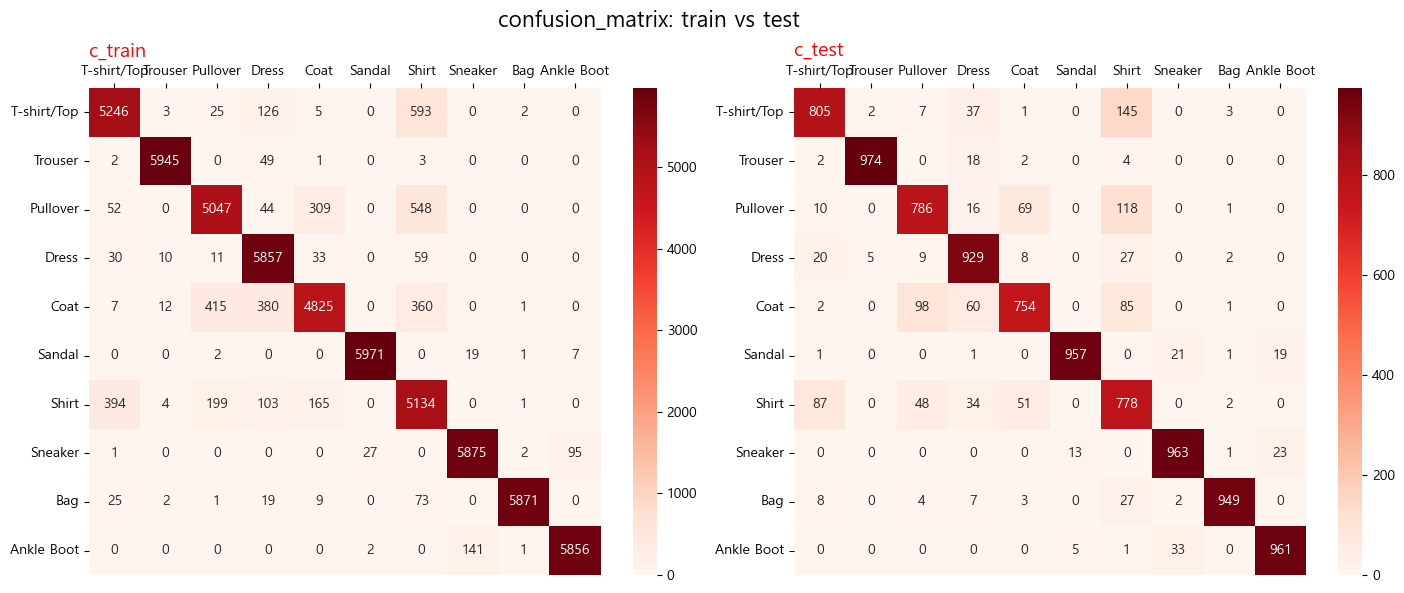


======>     toc = 232.7632 sec 


In [24]:
#
# 한글폰트설정 
#
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

c_train = confusion_matrix( y_train, y_train_pred )
c_test  = confusion_matrix( y_test,  y_test_pred  )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sb.heatmap(c_train, ax=ax1, annot=True, fmt='d',
           xticklabels=F_Name,
           yticklabels=F_Name,
           cmap='Reds')
ax1.xaxis.tick_top()                                    # This moves the x-axis to the top

sb.heatmap(c_test, ax=ax2, annot=True, fmt='d',
           xticklabels=F_Name,
           yticklabels=F_Name,
           cmap='Reds')
ax2.xaxis.tick_top()                                    # This moves the x-axis to the top

ax1.set_title('c_train', loc='left', color='red', size=14)
ax2.set_title('c_test',  loc='left', color='red', size=14)
#'
# Add a figure (super-) title above the subplots
#
plt.suptitle('confusion_matrix: train vs test', fontsize=16) 
plt.tight_layout()  # # Adjust the layout to make room for the figure title
plt.subplots_adjust(top=0.85,left=0.15)
plt.show()

toc()
